<a href="https://colab.research.google.com/github/bhushanyadav07/Python-for-data-science/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [66]:
df = pd.read_csv('/content/adult.data', names = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Matrial Status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'], 
                 sep = r'\s*, \s*',
                 engine = 'python', 
                 na_values = '?')
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Matrial Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [67]:
df.shape

(32561, 15)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Matrial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Gender            32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

<function matplotlib.pyplot.show>

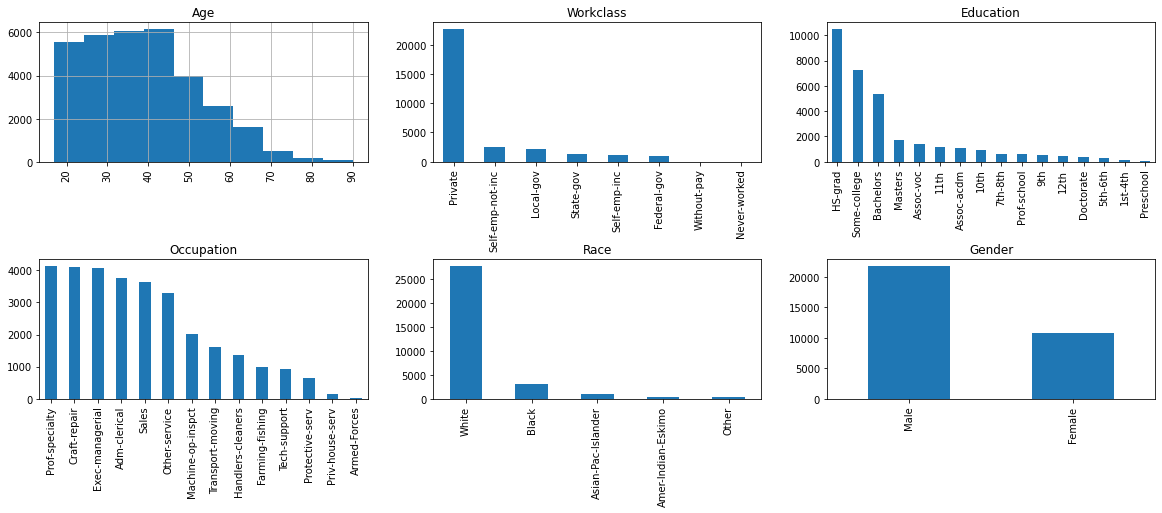

In [69]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig = plt.figure(figsize = (20, 20))
cols = 3
rows = math.ceil(float(df.shape[1]) / cols)


for i, col in enumerate(['Age', 'Workclass', 'Education', 'Occupation', 'Race', 'Gender']):
  ax = fig.add_subplot(rows, cols, i + 1)
  ax.set_title(col)
  if df.dtypes[col] == np.object:
    df[col].value_counts().plot(kind = 'bar', axes = ax)
  else: 
    df[col].hist(axes = ax)
    plt.xticks(rotation = 'vertical')
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)
plt.show

**Observations** : As we can see the feature how it will spread. in the occupation it will spread there is fairly good spread among the feature values.
This visualization may help us decide not to use certain feature when making prediction. in the above most of the features are homogeneous.

In [70]:
#use the label encoder to transform the text to numbers
import sklearn.preprocessing as preprocessing
lab = preprocessing.LabelEncoder()
df['Occupation'] = lab.fit_transform(df['Occupation'].astype(str))
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Matrial Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [71]:
df['Target'] = lab.fit_transform(df['Target'].astype(str))
df.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Matrial Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,3,Wife,White,Female,15024,0,40,United-States,1


In [72]:
df.Target.unique()

array([0, 1])

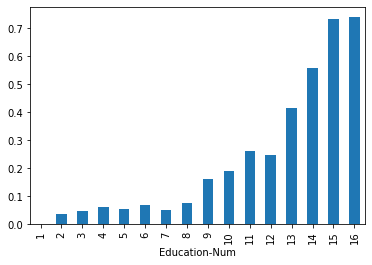

In [73]:
df.groupby('Education-Num').Target.mean().plot(kind = 'bar')
plt.show()

**Observation** : we can see very clearly the above graph the number of year of education the person has seems they corelate very highly.

## Machine learning part

In [0]:
from sklearn.model_selection import train_test_split

#taking the only feature which is important for now
X = df[['Education-Num', 'Occupation']]
y = df['Target']

#simply splitting the dataset 80% for the train set and 20% for test set
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [75]:
from sklearn.svm import SVC

classifier = SVC()
#fitting the data. This is where the SVM learn
classifier.fit(X_train, y_train)
#predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

#print
print(score)

0.7861200675571933


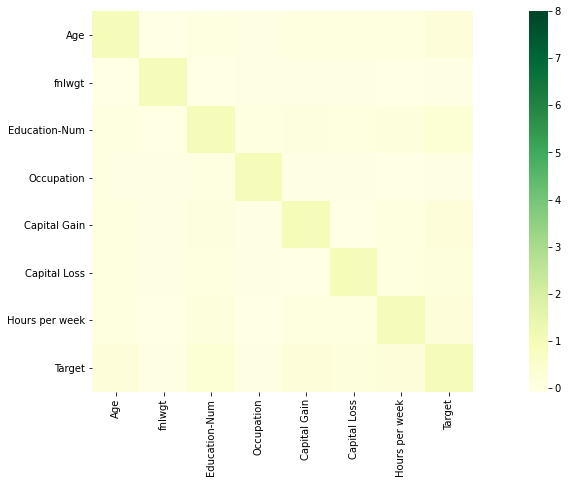

In [76]:
#correlation matrix

import seaborn as sns 
corrmat = df.corr()
f, ax = plt.subplots(figsize = (20, 7))
sns.heatmap(corrmat, vmax = 8, square = True, cmap="YlGn")
plt.show()

**Observation :** as we can all the features are strongly correlated with itself which entirely understandable and the lighter color show tend to show strong correlation the number of relation with education num. strongly correlate with the target 
2. also the non-numeric field are displyed for we use lable encoder


In [0]:
df['Race'] = lab.fit_transform(df['Race'].astype(str))
df['Gender'] = lab.fit_transform(df['Gender'].astype(str))
df['Matrial Status'] = lab.fit_transform(df['Matrial Status'].astype(str))
df['Education'] = lab.fit_transform(df['Education'].astype(str))

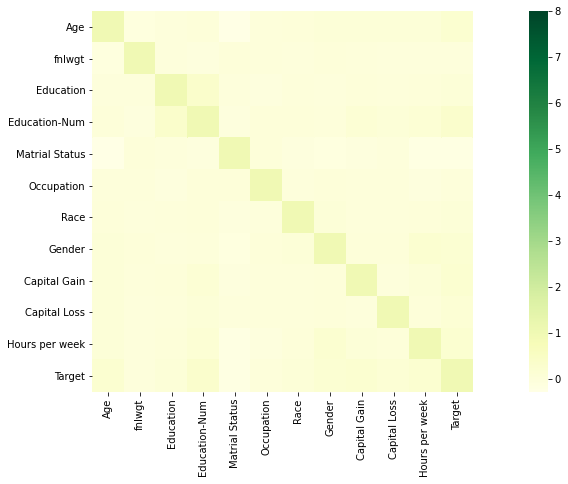

In [78]:
corrmat = df.corr()
f, ax = plt.subplots(figsize = (20, 7))
sns.heatmap(corrmat, vmax = 8, square = True, cmap="YlGn")
plt.show()

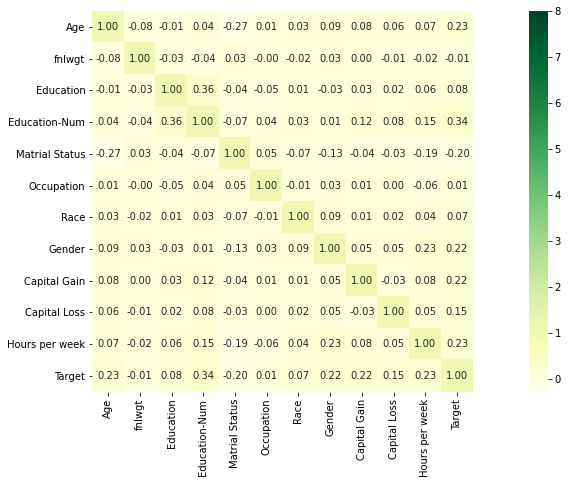

In [79]:
f, ax = plt.subplots(figsize = (20, 7))
sns.heatmap(corrmat, vmax = 8, square = True, cmap="YlGn", annot = True, fmt = '.2f')
plt.show()

In [80]:
X = df[['Education-Num', 'Occupation', 'Age']]
y = df['Target']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier = SVC()
#fitting the data. This is where the SVM learn
classifier.fit(X_train, y_train)
#predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

#print
print(score)

0.7858129894058038


In [81]:
classifier = SVC(kernel = 'rbf', C = 1.0)
#fitting the data. This is where the SVM learn
classifier.fit(X_train, y_train)
#predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

#print
print(score)

0.7858129894058038


In [82]:
#adjusting the penalty parameter
classifier = SVC(kernel = 'rbf', C = 10.0)
#fitting the data. This is where the SVM learn
classifier.fit(X_train, y_train)
#predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

#print
print(score)

0.7881160755412252


we continuing the twiking untill we get best accuracy that call hyper paramenter tuning